In [4]:
from standard_imports import *
np.set_printoptions(precision = 15, linewidth=700, suppress=False)
%load_ext autoreload
%autoreload 2

In [5]:
ML =4 
d_vec = np.array([0,0,0])   

dat = np.load(file_location(d_vec, ML))
z_d = dat['z_d_results']
q_2 = dat['q_2']
zeros = dat['zeros']
asymptotes = dat['asymptotes']

print(asymptotes[8])

9.0


In [6]:
ML1 =4 
d_vec1 = np.array([1,0,0])   

dat = np.load(file_location(d_vec1, ML1))
z_d1 = dat['z_d_results']
q_21 = dat['q_2']
zeros1 = dat['zeros']
asymptotes1 = dat['asymptotes']


print(asymptotes1[8])

6.015779500086


In [53]:
ML =4 
d_vec = np.array([0,0,0])   

dat = np.load(file_location(d_vec, ML))
z_d = dat['z_d_results']
q_2 = dat['q_2']
zeros = dat['zeros']
asymptotes = dat['asymptotes']

print(asymptotes[8])


x1 = np.linspace(0.01, 9, 500)
coll= np.load("derivative_graph_000.npy")
First1, Second1 = coll[:,0], coll[:,1]





dx = np.diff(q_2)[0]
D1_1 = np.diff(z_d)/dx
D1_x_1 = q_2[:-1] + dx/2


#using central difference method

zeta_plus_1 = z_d[1:]
zeta_minus_1 = z_d[:-1]


D1_1 = (zeta_plus_1[1:]/2 - zeta_minus_1[:-1]/2)/dx

D2_1 = (zeta_plus_1[1:] + zeta_minus_1[:-1] - 2*z_d[1:-1])/dx**2

D2_x_1 = q_2[1:-1]
D1_x_1 = q_2[1:-1]
Dx_1 = q_2[1:-1]


9.0


In [54]:
ML1 =4 
d_vec1 = np.array([1,0,0])   

dat = np.load(file_location(d_vec1, ML1))
z_d1 = dat['z_d_results']
q_21 = dat['q_2']
zeros1 = dat['zeros']
asymptotes1 = dat['asymptotes']


print(asymptotes1[8])


x2 = np.linspace(0.01, 6.015779500086, 500)
coll= np.load("derivative_graph_001.npy")
First2, Second2 = coll[:,0], coll[:,1]

dx = np.diff(q_21)[0]
D1_2 = np.diff(z_d1)/dx
D1_x_2 = q_21[:-1] + dx/2

print(dx)
#using central difference method

zeta_plus_2 = z_d1[1:]
zeta_minus_2 = z_d1[:-1]

D2_2 = (zeta_plus_2[1:] + zeta_minus_2[:-1] - 2*z_d1[1:-1])/dx**2

D2_x_2= q_21[1:-1]

D1_2 = (zeta_plus_2[1:]/2 - zeta_minus_2[:-1]/2)/dx


D2_x_2 = q_21[1:-1]
D1_x_2 = q_21[1:-1]
Dx_2 = q_21[1:-1]



6.015779500086
0.0020016939843040507


In [9]:
D1_x_1, D1_1
x1, First1


D2_x_1, D2_1
x1, Second1


x2, First2
D1_x_2, D1_2


x2, Second2
D2_x_2, D2_2


(array([2.001693984304051e-03, 4.003387968608101e-03, 6.005081952912153e-03, ..., 1.200215712988709e+01, 1.200415882387139e+01, 1.200616051785570e+01]),
 array([2.349366763478646e+02, 2.436588179836183e+02, 2.527908043484985e+02, ..., 5.977246731896957e+06, 2.390586725655007e+07, 1.584332693690776e+18]))

In [140]:
%matplotlib qt

plt.figure(figsize=(8, 4), dpi = 300)
plot_nice(D1_x_1, D1_1, asymptotes[:8], zeros)
plt.plot(x1, First1, label = "Analytical Derivative", linewidth = 0.5)
plt.ylim(0,80)


(0.0, 80.0)

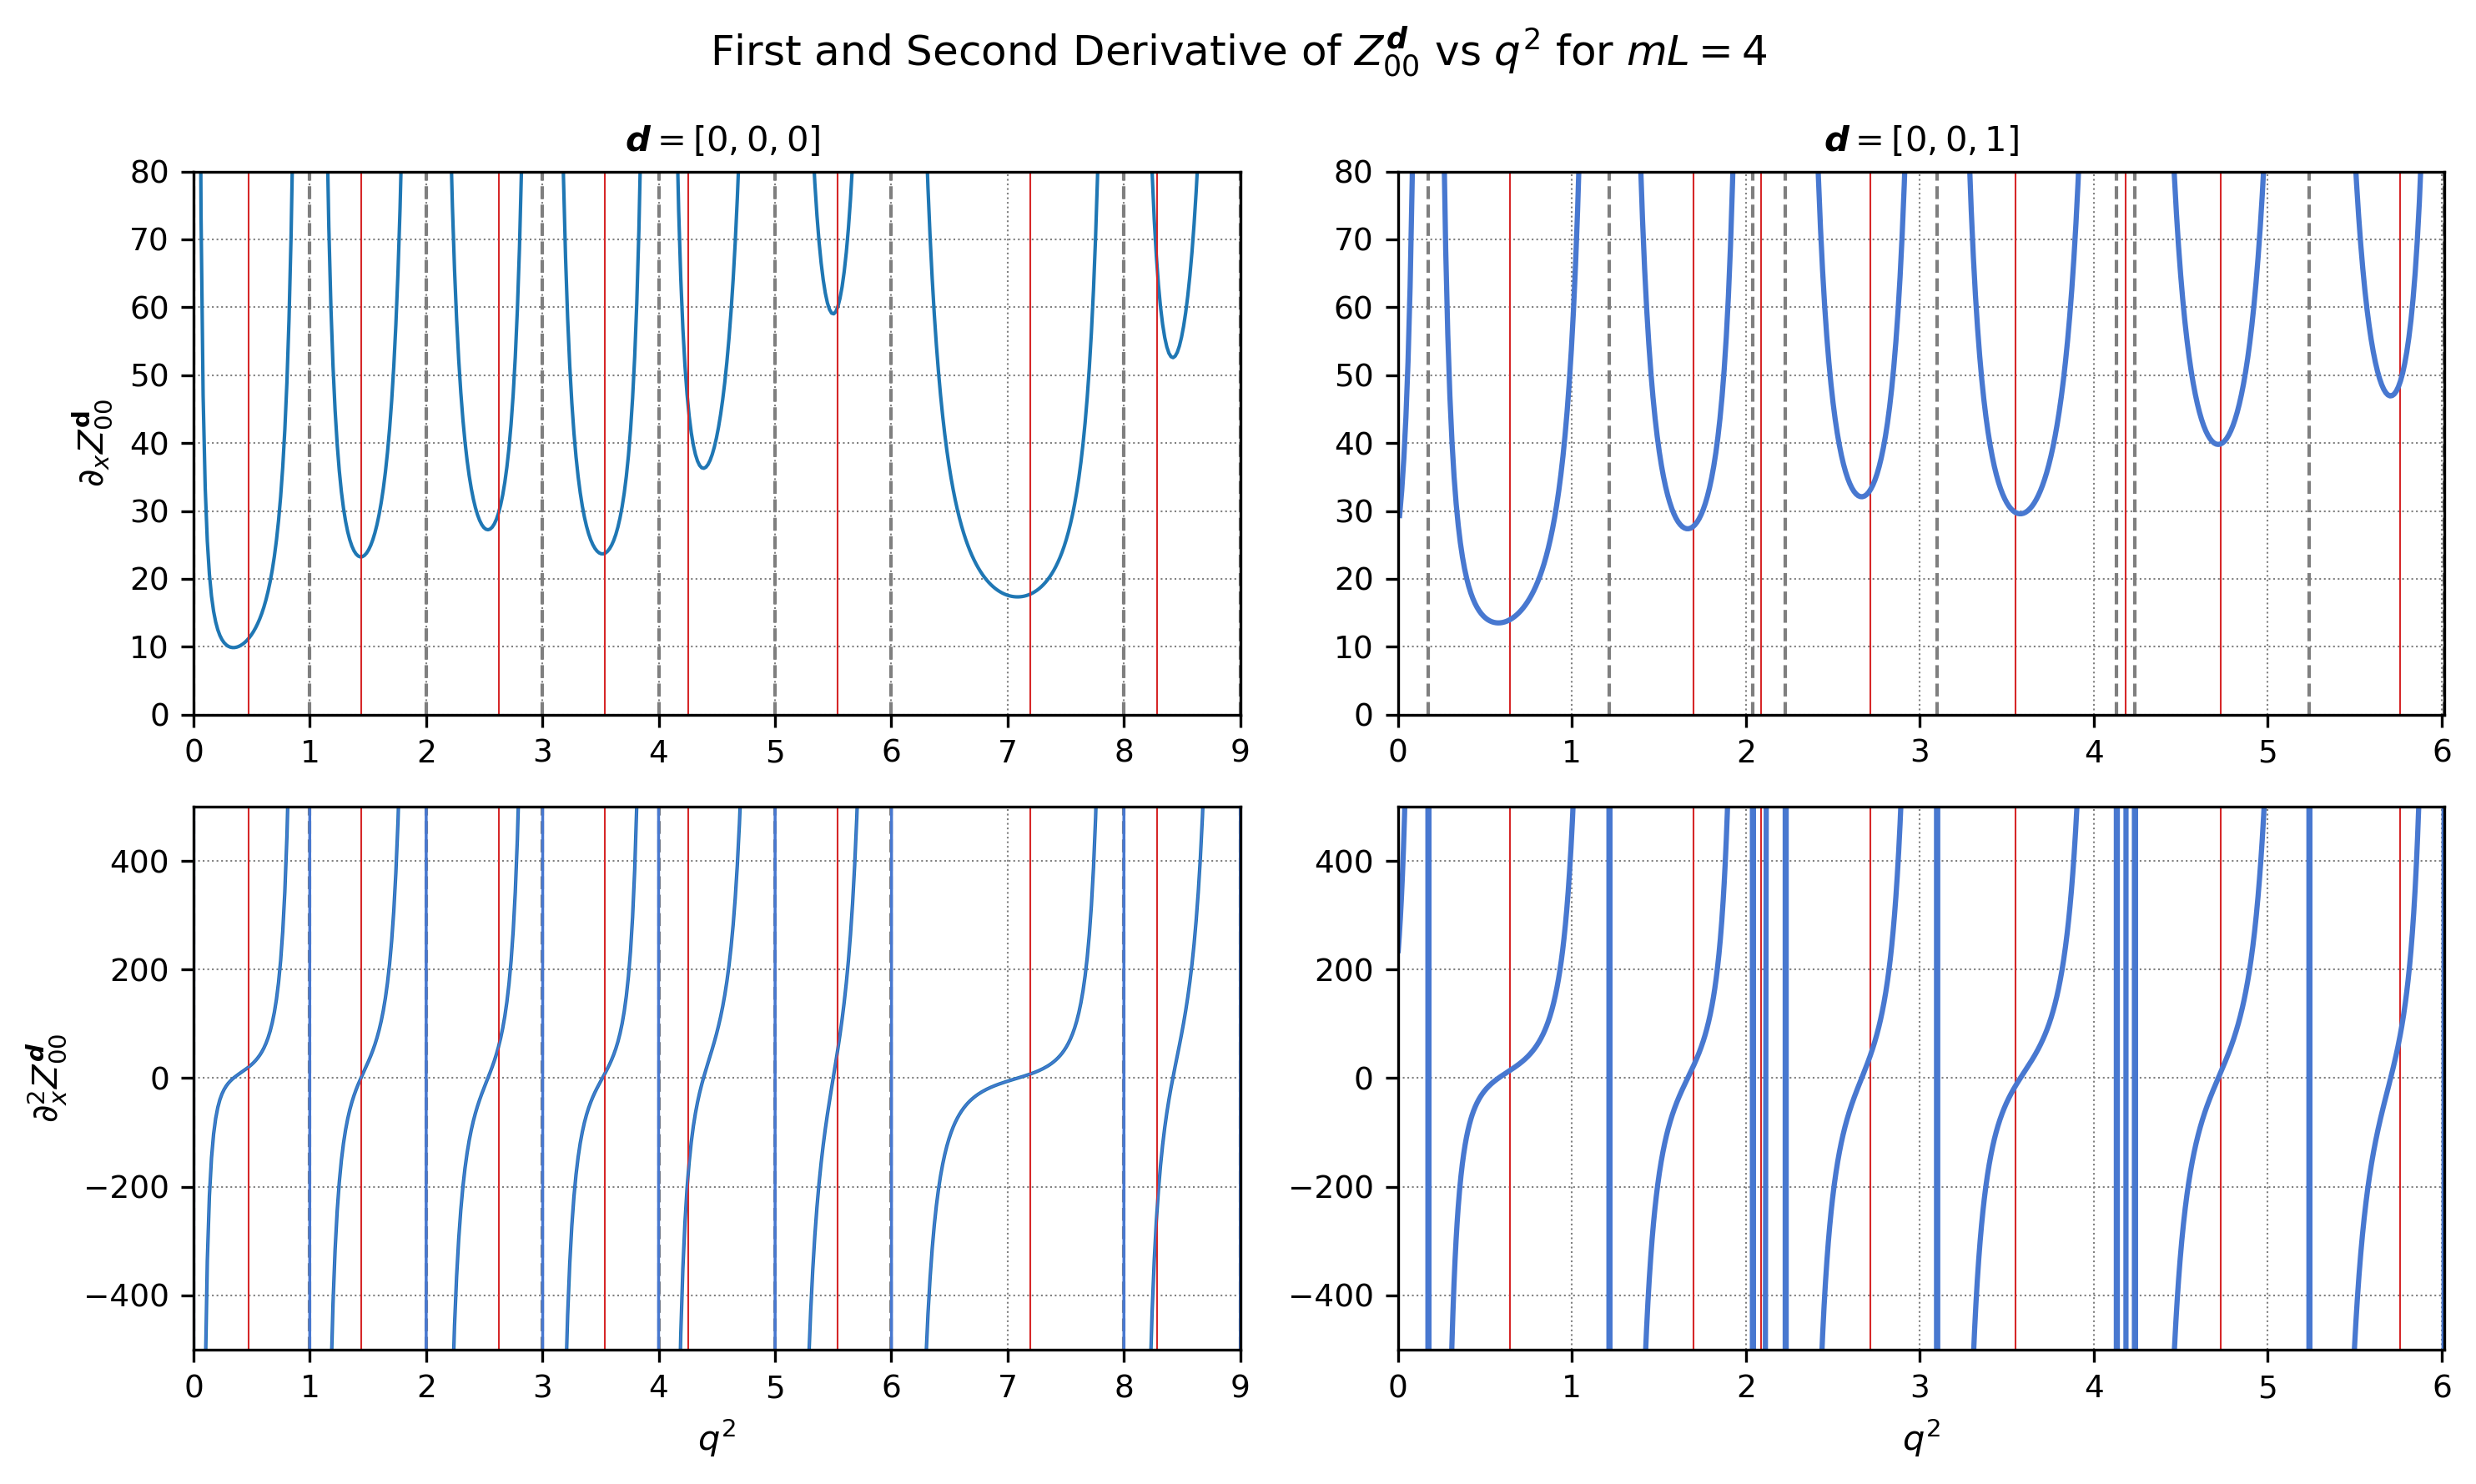

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

def plot_nice(q_2=np.array([]), z_d_results=np.array([]), asymptotes=np.array([]), zeros=np.array([]), d_vec=np.array([0,0,1]), ax=None):
    if ax is None:
        ax = plt.gca()
        
    z_d_plot = np.copy(z_d_results)
    q_2_plot = np.copy(q_2)
    first_asymptotes = np.copy(asymptotes)
    
    # Handling extreme values
    z_d_plot[np.abs(z_d_plot) > 3e5] = np.nan

    # Plotting the main curve
    ax.plot(q_2_plot, z_d_plot, linewidth=1, label="$Z_d$ curve", color = 'tab:blue')
    
    # Asymptotes
    for i in first_asymptotes:
        ax.axvline(i, linestyle="--", color = 'tab:grey', linewidth=1, label="Asymptote" if i == first_asymptotes[0] else "")
    
    # Zeros
    for i in zeros:
        ax.axvline(i, color = 'tab:red', linewidth=0.5,  label="Zero" if i == zeros[0] else "")

    # Labels and limits
    #ax.set_xlabel("$q^2$", fontsize=12) 
    #ax.set_ylabel("$Z_d$", fontsize=12)
    ax.set_xlim(0, first_asymptotes[-1])
    ax.set_ylim(-50, 50)

    # Tick marks
    max_x = first_asymptotes[-1]
    steps = np.ceil(max_x / 50)
    ax.set_xticks(np.arange(0, max_x, steps))
    ax.tick_params(axis='both', which='major', labelsize=9)

    # Grid and legend
    ax.grid(True, which='major', linestyle=':', linewidth='0.5', color='grey')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Removing duplicates
    #ax.legend(by_label.values(), by_label.keys(), fontsize=9, loc='upper right')

    # Title (optional, depending on use case)
    # ax.set_title("Title Here", fontsize=14)

# Example usage
fig, axs = plt.subplots(2, 2, figsize=(10, 6), dpi=300)
plt.subplots_adjust(hspace=0.3, wspace=0.3, right=0.75) 



D1_x_1, D1_1
x1, First1

# Plot for zeta_d
plot_nice(x1, First1, asymptotes, zeros, d_vec, ax=axs[0, 0])
#axs[0, 0].plot(x1, First1, color = 'tab:green', linewidth = 0.5)
axs[0, 0].set_xlim(0, asymptotes[8])
axs[0, 0].set_ylabel('$\partial_xZ_{{00}}^{\\bf d}$')
axs[0, 0].set_title(' ${\\boldsymbol{d}}  = [0,0,0]$', fontsize=10)
axs[0, 0].set_ylim(0, 80)



x2, First2
D1_x_2, D1_2
# Plot for zeta_d1
plot_nice(x2, First2, asymptotes1, zeros1, d_vec1, ax=axs[0, 1])
axs[0, 1].plot(x2, First2)
axs[0, 1].set_xlim(0, asymptotes1[8])
#axs[0, 1].set_ylabel('$Z^{\\bf d}$')
axs[0, 1].set_title('$ {\\boldsymbol{d}}  = [0,0,1]$', fontsize=10)
axs[0, 1].set_ylim(0, 80)


D2_x_1, D2_1
x1, Second1
# Plot for zeta_d2
plot_nice(x1, Second1, asymptotes, zeros, d_vec, ax=axs[1, 0])
axs[1, 0].plot(D2_x_1, D2_1, label = "Analytical Derivative", linewidth = 0.5)
#axs[1, 0].plot(x1, Second1)
axs[1, 0].set_xlim(0, asymptotes[8])
axs[1, 0].set_ylabel('$\partial^2_x Z_{{00}}^{\\boldsymbol{d}}$')
axs[1, 0].set_xlabel("$q^2$") 
axs[1, 0].set_ylim(-500, 500)


x2, Second2
D2_x_2, D2_2
# Plot for zeta_d3
plot_nice(x2, Second2, asymptotes1, zeros1, d_vec1, ax=axs[1, 1])
axs[1, 1].plot(D2_x_2, D2_2)
#plt.plot(x2, Second2)
axs[1, 1].set_xlim(0, asymptotes1[8])
#axs[1, 1].set_ylabel('$Z^{\\bf d}$')
axs[1, 1].set_xlabel("$q^2$") 
axs[1, 1].set_ylim(-500, 500)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tab:blue', lw=2),
                Line2D([0], [0], color='tab:grey', lw=1, linestyle='--', label='Asymptote'),
                Line2D([0], [0], color='tab:red', lw=0.5, label='Zero')]

# Place a single legend outside the subplots
#fig.legend(custom_lines, ['$Z_d$ curve', 'Asymptote', 'Zero'], loc='center left', ncol=1, bbox_to_anchor=(1, 0.5), fontsize=12)


plt.suptitle('First and Second Derivative of $Z_{{00}}^{\\boldsymbol{d}}$ vs $q^2$ for $mL = 4$')
plt.tight_layout()

plt.show()






In [17]:
from scipy import interpolate as interp

D1_1[np.isinf(D1_1)] = 1e15
D2_1[np.isinf(D2_1)] = 1e15
D1_2[np.isinf(D1_2)] = 1e15
D2_2[np.isinf(D2_2)] = 1e15



#using cubic spline to find difference between N1, N2 and the analytical solution
D11 = interp.CubicSpline(Dx_1,D1_1)
D21 = interp.CubicSpline(Dx_1,D2_1)

D12 = interp.CubicSpline(Dx_2,D1_2)
D22 = interp.CubicSpline(Dx_2,D2_2)

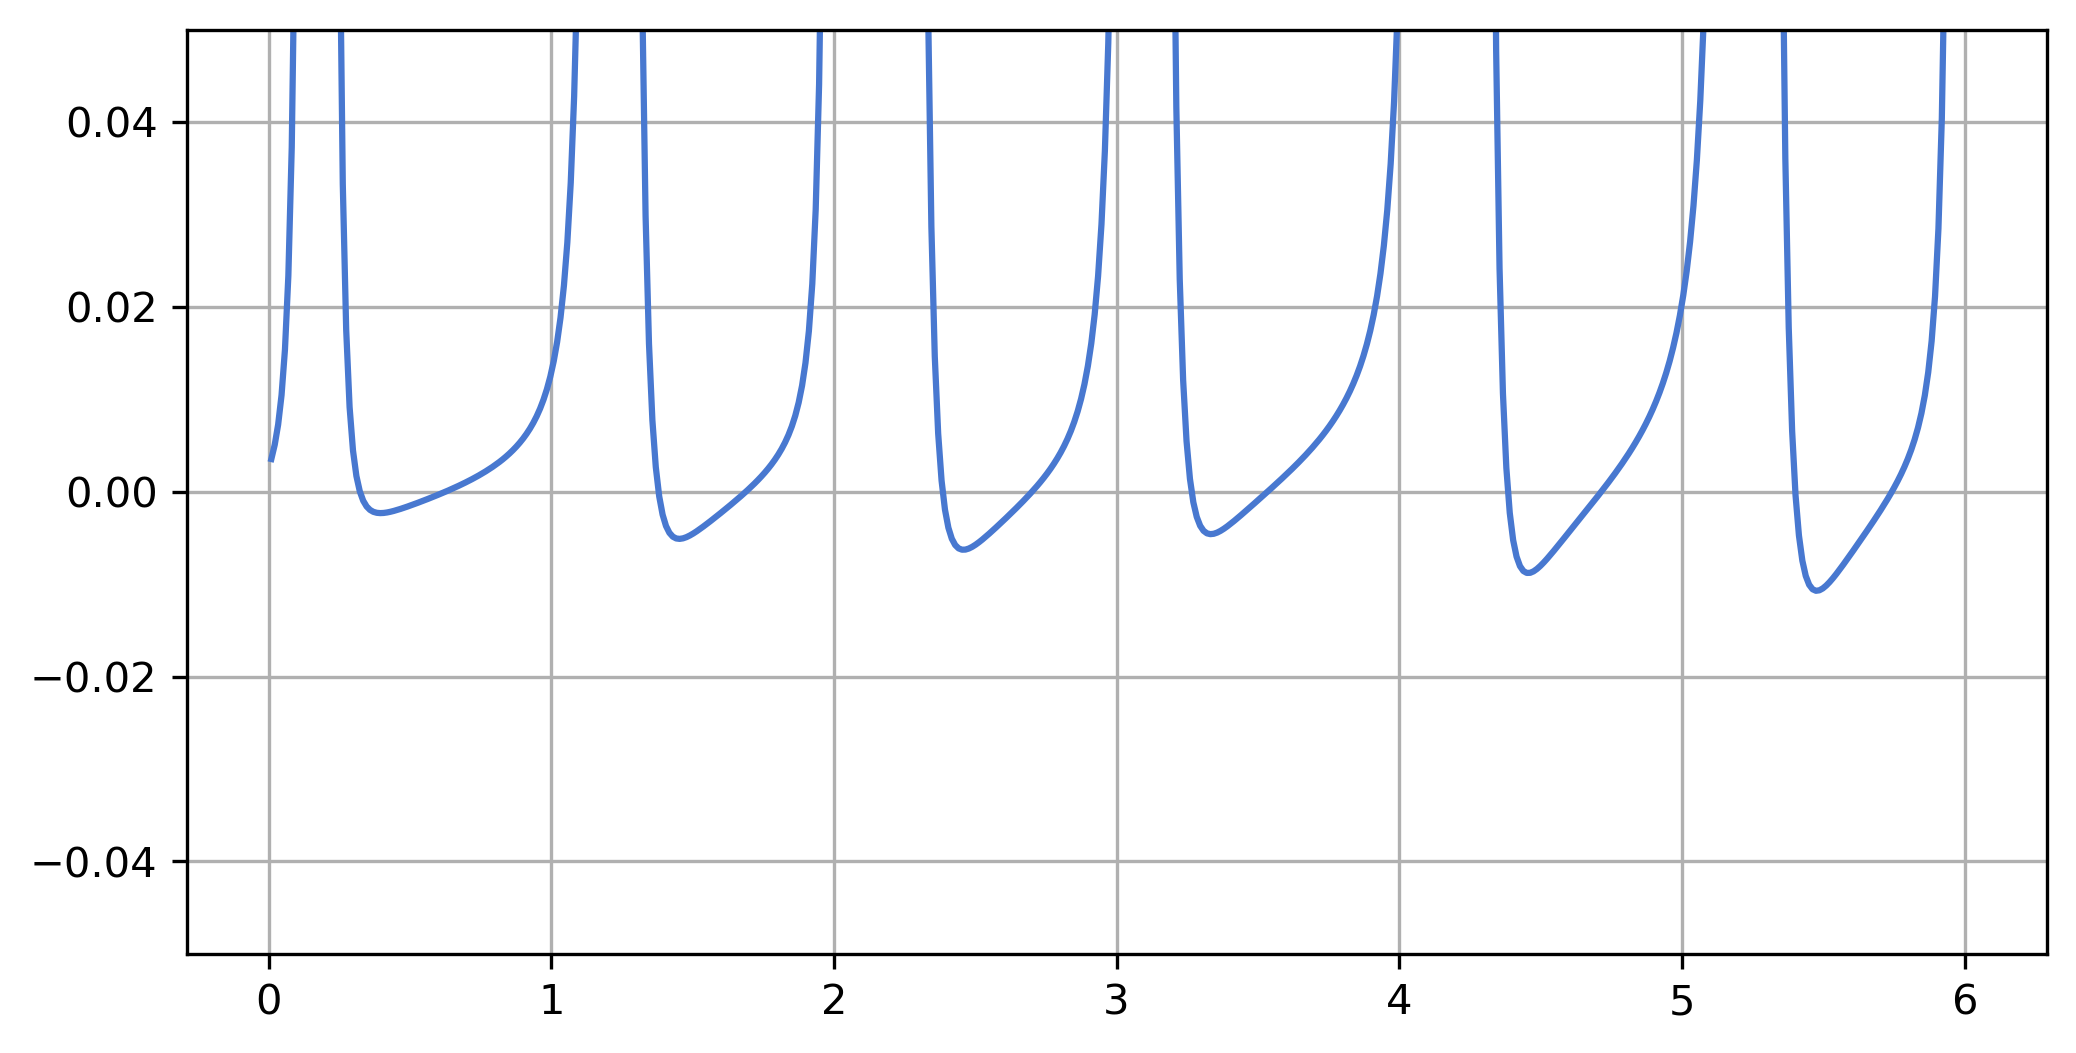

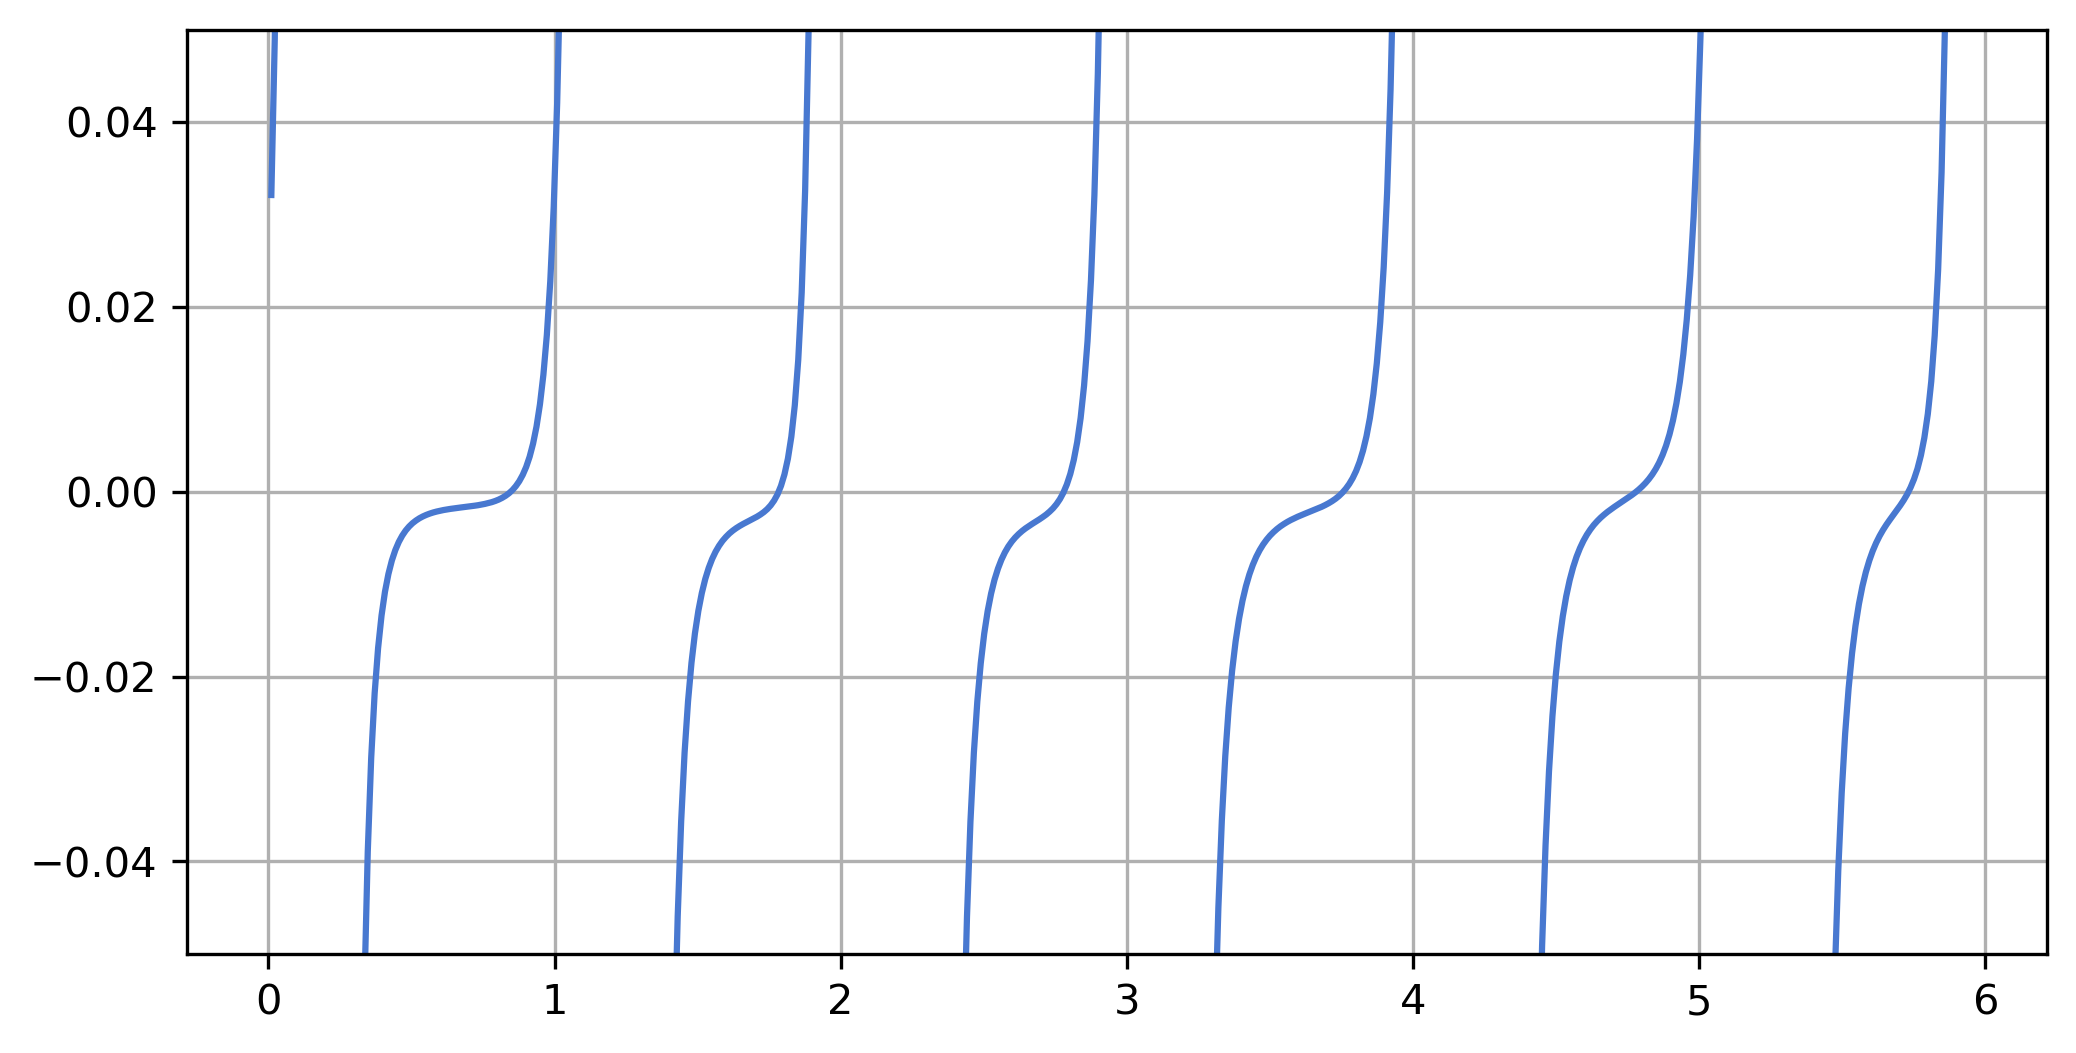

In [186]:

%matplotlib inline

plt.figure(figsize=(8, 4), dpi = 300)
y = D12(x2)- First2
y[np.abs(y)>5e1] = np.nan
#plt.plot(x2, First2)
plt.plot(x2, y)
plt.ylim(-0.05, 0.05)
plt.grid()
plt.show()


plt.figure(figsize=(8, 4), dpi = 300)
y = D22(x2)- Second2
y[np.abs(y)>1e0] = np.nan
#plt.plot(x2, First2)
plt.plot(x2, y)
plt.ylim(-0.05, 0.05)
plt.grid()
plt.show()

In [182]:

plt.figure(figsize=(8, 4), dpi = 300)
y = D22(x2)- Second2
y[np.abs(y)>1e0] = np.nan
#plt.plot(x2, First2)
plt.plot(x2, y)
plt.ylim(-0.05, 0.05)
plt.grid()
plt.show()


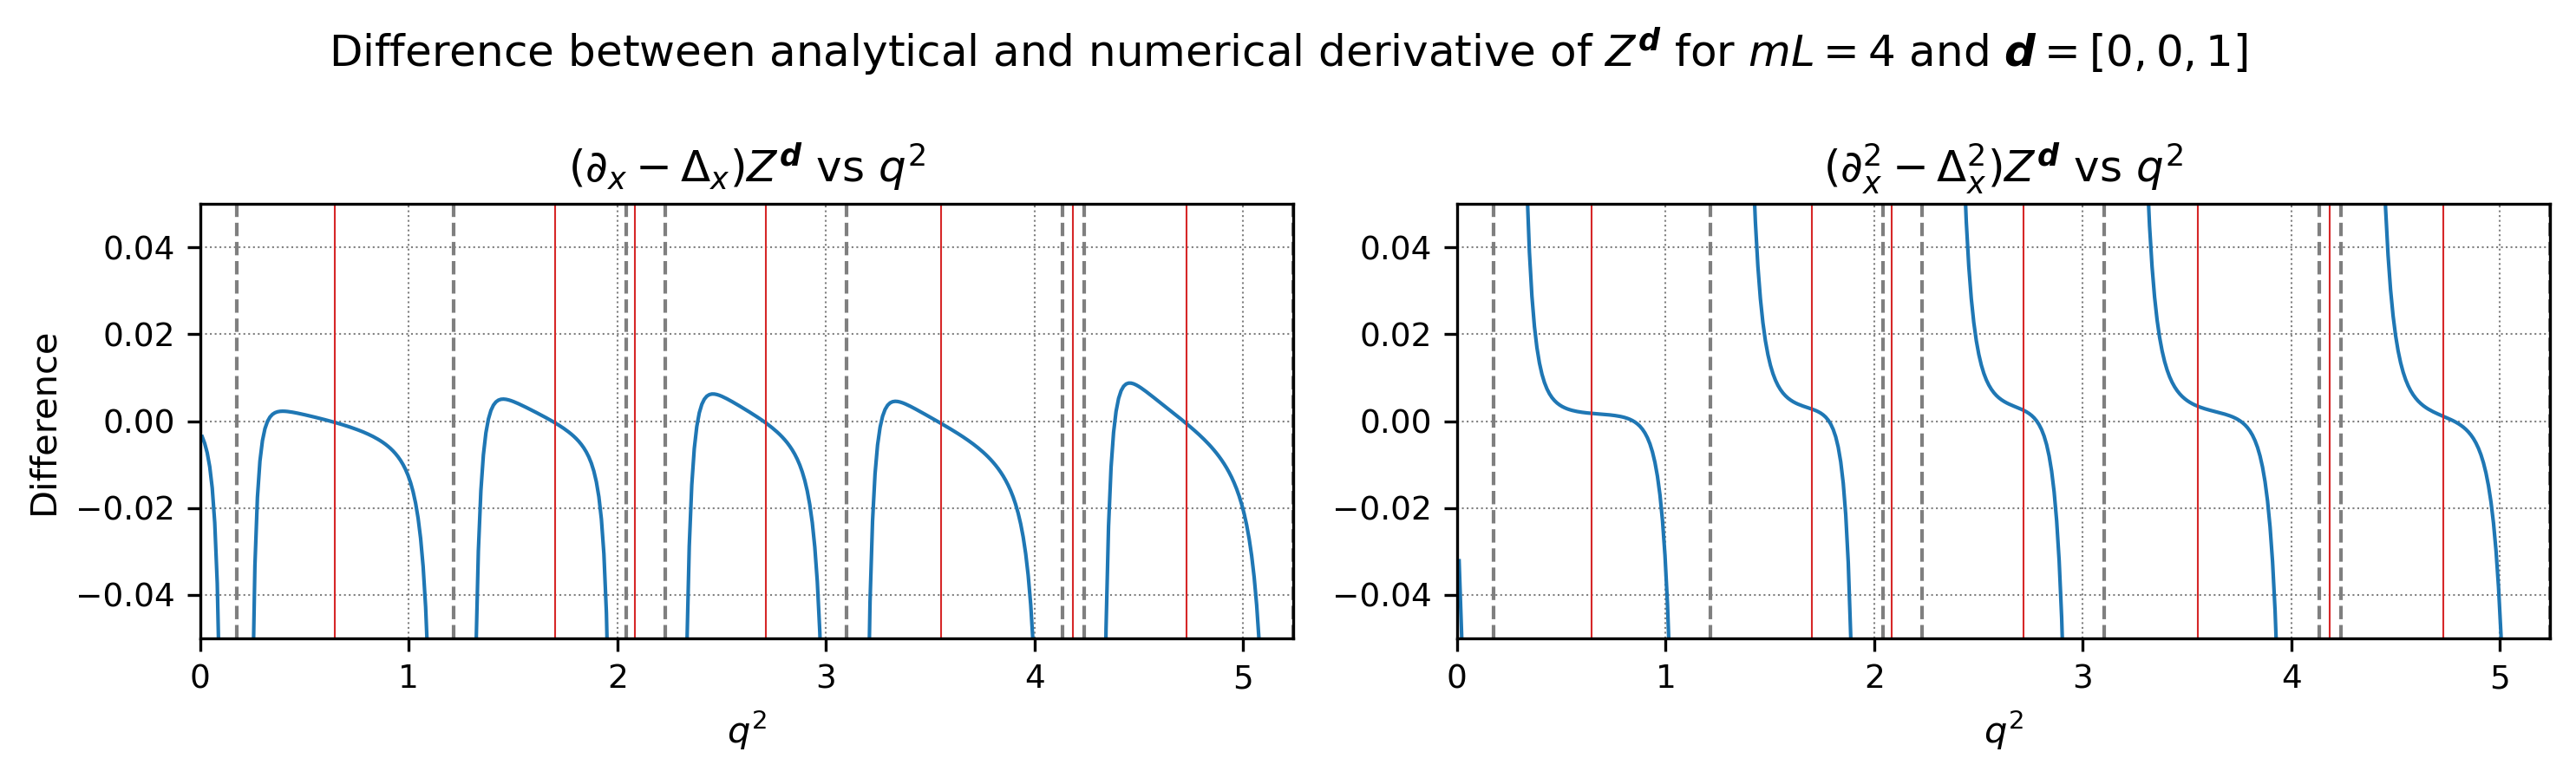

In [215]:
sns.set_palette('muted')

def plot_nice(q_2=np.array([]), z_d_results=np.array([]), asymptotes=np.array([]), zeros=np.array([]), d_vec=np.array([0,0,1]), ax=None):
    if ax is None:
        ax = plt.gca()
        
    z_d_plot = np.copy(z_d_results)
    q_2_plot = np.copy(q_2)
    first_asymptotes = np.copy(asymptotes)
    
    # Handling extreme values
    z_d_plot[np.abs(z_d_plot) > 3e5] = np.nan

    # Plotting the main curve
    ax.plot(q_2_plot, z_d_plot, linewidth=1, label="$Z_d$ curve", color = 'tab:blue')
    
    # Asymptotes
    for i in first_asymptotes:
        ax.axvline(i, linestyle="--", color = 'tab:grey', linewidth=1, label="Asymptote" if i == first_asymptotes[0] else "")
    
    # Zeros
    for i in zeros:
        ax.axvline(i, color = 'tab:red', linewidth=0.5,  label="Zero" if i == zeros[0] else "")

    # Labels and limits
    #ax.set_xlabel("$q^2$", fontsize=12) 
    #ax.set_ylabel("$Z_d$", fontsize=12)
    ax.set_xlim(0, first_asymptotes[-1])
    ax.set_ylim(-50, 50)

    # Tick marks
    max_x = first_asymptotes[-1]
    steps = np.ceil(max_x / 50)
    ax.set_xticks(np.arange(0, max_x, steps))
    ax.tick_params(axis='both', which='major', labelsize=9)

    # Grid and legend
    ax.grid(True, which='major', linestyle=':', linewidth='0.5', color='grey')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Removing duplicates
    #ax.legend(by_label.values(), by_label.keys(), fontsize=9, loc='upper right')

    # Title (optional, depending on use case)
    # ax.set_title("Title Here", fontsize=14)



# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 3), dpi=300)

# Plotting the difference for D12(x2) - First2 in the first subplot
y1 = First2-D12(x2) 
y1[np.abs(y1) > 5e1] = np.nan
plot_nice(x2, y1, asymptotes1[:8], zeros1, d_vec1, ax=axs[0])
axs[0].set_ylim(-0.05, 0.05)
axs[0].grid(True)
axs[0].set_title('$(\partial_x- \Delta_x)  Z^{\\boldsymbol{ d}}$ vs $q^2$')
axs[0].set_xlabel("$q^2$")
axs[0].set_ylabel('Difference')
#axs[0].legend()

# Plotting the difference for D22(x2) - Second2 in the second subplot
y2 = Second2 - D22(x2)
y2[np.abs(y2) > 1e0] = np.nan
plot_nice(x2, y2, asymptotes1[:8], zeros1, d_vec1, ax=axs[1])
axs[1].set_ylim(-0.05, 0.05)
axs[1].grid(True)
axs[1].set_title('$(\partial^2_x- \Delta^2_x)  Z^{\\boldsymbol{d}}$ vs $q^2$')
axs[1].set_xlabel("$q^2$")
##axs[1].legend()

plt.suptitle('Difference between analytical and numerical derivative of $Z^{\\boldsymbol{d}}$ for $mL = 4$ and ${\\boldsymbol{d}} = [0,0,1]$')
plt.tight_layout()
plt.show()

In [100]:

prefix = "$x_{" 
affix = "}^{\\raisebox{-0.5ex}{\\text{\\tiny (0)}}}$"

prefix = "$x_{\\raisebox{0.5ex}{\\text{\\tiny" 
affix = "}}}^{\\raisebox{-1ex}{\\text{\\tiny (0)}}}$"



# prefix =  'x_{' 
# affix = '}^{(0)} '
print(affix)

}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$


In [101]:
for i in range(1,16):
    print( prefix + str(i) + affix  )

$x_{\raisebox{0.5ex}{\text{\tiny1}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny2}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny3}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny4}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny5}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny6}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny7}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny8}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny9}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny10}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny11}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny12}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny13}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny14

In [102]:
for i in range(1,16):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


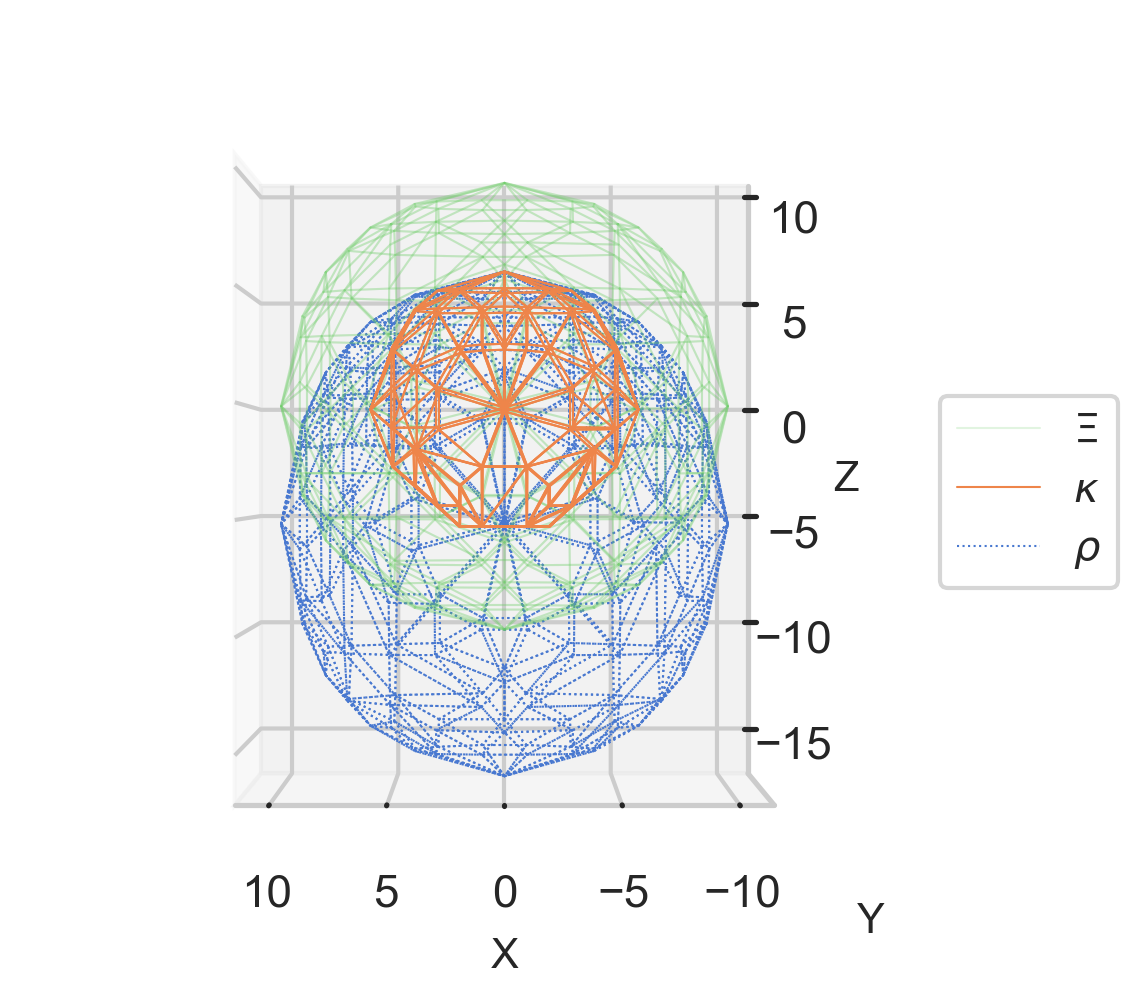

: 

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.spatial import ConvexHull
import seaborn as sns

def graph_LT(q_2_star=1.5, cutoff=9, d = np.array([0,0,0]), ML = 4):
    sns.set(style="whitegrid")
    sns.set_palette('muted')
    d_scalar = np.linalg.norm(d)


    m_tilde_sq = (ML/np.pi)**2
    #do better here
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)   
        beta = d_scalar/np.sqrt(d_scalar**2 + 4*q_2_star + m_tilde_sq)
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta = 0
        gamma = 1
        beta_norm = d

    
    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]

    ####### parallel and perp components of r
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    r_perp = r- r_parallel[:,np.newaxis]*beta_norm

    r_perp_sq = r_2 -r_parallel**2
    omega_r = np.sqrt(r_2+m_tilde_sq/4)
    r_star_parallel = gamma*(r_parallel-omega_r*beta)
    r_star = r_star_parallel[:,np.newaxis]*beta_norm + r_perp 
    r_star_2 = np.einsum("ij,ij->i", r_star,r_star)

    #3d plot of r_star
    fig = plt.figure(figsize=(5,4), dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    #set view on xy plane
    ax.view_init(elev=0, azim=90)
    #set equal aspect ratio for 3d plot

    #do using plot trisurf
    kappa = gamma*(np.sqrt(cutoff) - beta*np.sqrt(cutoff + 1/4*m_tilde_sq))
    r_star_bounded = r_star[r_star_2<=kappa**2]

    # Create Convex Hull for r_star
    hull_r_star = ConvexHull(r_star)
    hull_r = ConvexHull(r)
    hull_r_star_bounded = ConvexHull(r_star_bounded)


    # Plot the bounding surface for r_star
    for s in hull_r_star.simplices:
        s = np.append(s, s[0])  # Close the loop
        ax.plot(r_star[s, 0], r_star[s, 1], r_star[s, 2], ":", color="C0", linewidth=0.5, label = "$\\rho$")

    # Plot the bounding surface for r

    for s in hull_r.simplices:
        s = np.append(s, s[0])  # Close the loop
        ax.plot(r[s, 0], r[s, 1], r[s, 2], "-",color = "C2",linewidth=0.5, alpha = 0.2, label="$\Xi$")


    # Plot the bounding surface for r_star_bounded
    for s in hull_r_star_bounded.simplices:
        s = np.append(s, s[0])  # Close the loop
        ax.plot(r_star_bounded[s, 0], r_star_bounded[s, 1], r_star_bounded[s, 2] , "-", color = "C1" ,linewidth=0.5,label="$\kappa$")

    handles, labels = plt.gca().get_legend_handles_labels()
    ax.set_aspect('equal')
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)
    ax.set_zlabel('Z', fontsize=10)

    ax.set_yticks([])

    #create suitable title
    #plt.title("Bounding Surfaces for $x = {}$, $d = {}$, $\Xi = {}$, $\\kappa = {}$".format(q_2_star, d, round(np.sqrt(cutoff)), round(kappa, 2)))

    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='center right',  bbox_to_anchor=(1.2, 0.5), fontsize=10)
    plt.show()

graph_LT(0.5,1e2, d=np.array([0,0,1]))

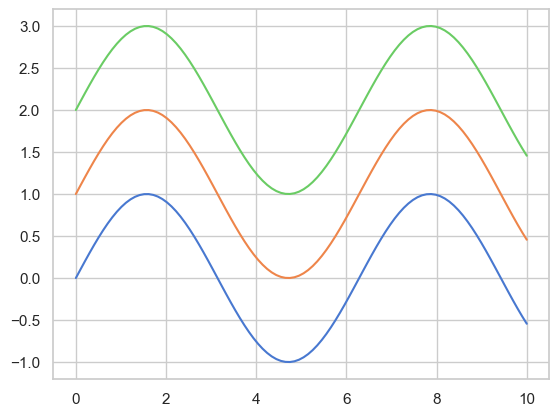

In [235]:
x = np.linspace(0, 10, 100)

y = np.sin(x)

plt.plot(x, y)
plt.plot(x, y+1)

plt.plot(x, y+2)

In [1]:
sd

NameError: name 'sd' is not defined

In [39]:
print(zeros)

[ 0.472894248699386  1.441591313657851  2.62700761230748   3.536619947663408  4.251705973624203  5.537700774672     7.196263202615586  8.287953654425843  9.53453142742945  10.55053411627602  11.701495743249124 12.310239181089791 13.383115150471767 15.353737467186152 16.12182533121825  17.532541534431186 18.605393175988226 19.518639372215425 20.403318680414294 21.694417867168394]


In [40]:
print(asymptotes)   

[ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 16. 17. 18. 19. 20. 21. 22.]


In [38]:
import time

import numpy as np
import pyaudio

p = pyaudio.PyAudio()

volume = 0.5  # range [0.0, 1.0]
fs = 2000  # sampling rate, Hz, must be integer 44100
duration = 5.0  # in seconds, may be float
f = 440.0  # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array

beats = np.arange(0, 10, 100)


print(np.arange(fs * duration))
samples = (np.sin(2 * np.pi * np.arange(fs * duration) * f / fs)).astype(np.float32)

samples = (D11(x)).astype(np.float32)



# per @yahweh comment explicitly convert to bytes sequence
output_bytes = (volume * samples).tobytes()

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively)
start_time = time.time()
stream.write(output_bytes)
print("Played sound for {:.2f} seconds".format(time.time() - start_time))

stream.stop_stream()
stream.close()

p.terminate()

[0.000e+00 1.000e+00 2.000e+00 ... 9.997e+03 9.998e+03 9.999e+03]
Played sound for 49.66 seconds


In [45]:
import time
import numpy as np
import pyaudio

p = pyaudio.PyAudio()

volume = 0.5  # range [0.0, 1.0]
fs = 44100  # sampling rate, Hz, must be integer
f = 440.0  # sine frequency, Hz, may be float
beat_duration = 0.2  # duration of each beat in seconds
# Times at which each beat should start, in seconds
beats = zeros

# Initialize an array of zeros to hold the full sequence of samples
total_duration = beats[-1] + beat_duration  # Total duration of the audio sequence
total_samples = int(fs * total_duration)
audio_sequence = np.zeros(total_samples)

# Generate the samples for each beat and add them into the audio sequence
for beat_time in beats:
    start_sample = int(fs * beat_time)
    end_sample = int(fs * (beat_time + beat_duration))
    beat_samples = np.sin(2 * np.pi * np.arange(start_sample, end_sample) * f / fs)
    audio_sequence[start_sample:end_sample] += beat_samples

# Ensure the audio_sequence is in the range [-1.0, 1.0]
audio_sequence = np.clip(audio_sequence, -1.0, 1.0)

# Convert to float32 array
samples = audio_sequence.astype(np.float32)

# Convert to bytes sequence
output_bytes = (volume * samples).tobytes()

# Open the stream
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# Play the audio sequence
start_time = time.time()
stream.write(output_bytes)
print("Played sound for {:.2f} seconds".format(time.time() - start_time))

# Clean up
stream.stop_stream()
stream.close()
p.terminate()


Played sound for 21.88 seconds


In [37]:
print(d_vec)

[0 0 0]


In [12]:
print(len(np.arange(fs * duration)))

220500


In [34]:
D11(q_2)
x = np.linspace(q_2[0], q_2[-1], 10000)

/Users/ericrechberger/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ericrechberger/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


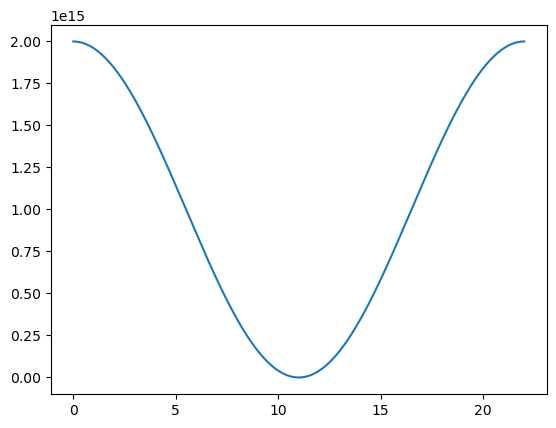

In [36]:
import numpy as np

# Define the points at which to evaluate the spline
x_values = np.linspace(D1_x_1.min(), D1_x_1.max(), len(D1_x_1))

# Evaluate the spline at these points
y_values = D11(x_values)

# Compute the Fourier transform of the resulting values
D11_fourier = np.fft.fft(y_values, )


plt.plot(x_values, D11_fourier)

In [65]:
import time
import numpy as np
import pyaudio

def generate_beat_sequence(beats, frequency, fs, beat_duration, fade_duration, total_samples):
    audio_sequence = np.zeros(total_samples)
    for beat_time in beats:
        start_sample = int(fs * beat_time)
        end_sample = int(fs * (beat_time + beat_duration))
        beat_samples = np.arange(start_sample, end_sample)
        sine_wave = np.sin(2 * np.pi * beat_samples * frequency / fs)
        
        # Create fade-in and fade-out ramps
        fade_in_samples = int(fs * fade_duration)
        fade_out_samples = int(fs * fade_duration)
        
        fade_in = np.linspace(0, 1, fade_in_samples)
        fade_out = np.linspace(1, 0, fade_out_samples)
        
        # Apply fade-in and fade-out
        sine_wave[:fade_in_samples] *= fade_in
        sine_wave[-fade_out_samples:] *= fade_out
        
        audio_sequence[start_sample:end_sample] += sine_wave
    return audio_sequence

p = pyaudio.PyAudio()

volume = 0.5  # range [0.0, 1.0]
fs = 44100  # sampling rate, Hz, must be integer
f = 880.0  # frequency for the first set of beats, Hz
f2 = 440.0  # frequency for the second set of beats, Hz
beat_duration = 0.05  # duration of each beat in seconds
fade_duration = 0.02  # duration of the fade in and fade out in seconds



# Calculate total duration based on the latest beat time from both sets
total_duration = max(max(asymptotes), max(zeros)) + beat_duration
total_samples = int(fs * total_duration)

# Generate audio sequences for both sets of beats
audio_sequence1 = generate_beat_sequence(asymptotes, f, fs, beat_duration, fade_duration, total_samples)
audio_sequence2 = generate_beat_sequence(zeros, f2, fs, beat_duration, fade_duration, total_samples)

# Combine both audio sequences
audio_sequence = np.clip(audio_sequence1 + audio_sequence2, -1.0, 1.0)

# Convert to float32 array and to bytes sequence
samples = audio_sequence.astype(np.float32)
output_bytes = (volume * samples).tobytes()

# Open the stream and play the audio sequence
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fs, output=True)
start_time = time.time()
stream.write(output_bytes)
print("Played sound for {:.2f} seconds".format(time.time() - start_time))

# Clean up
stream.stop_stream()
stream.close()
p.terminate()


Played sound for 22.06 seconds


In [85]:
%matplotlib qt

plt.figure(figsize=(40, 4), dpi = 300)

plt.plot(np.arange(len(audio_sequence)),audio_sequence)
#plt.xlim(0,10000)

In [57]:
z0 = np.load(file_location(np.array([0,0,0]), 4))['zeros']
z1 = np.load(file_location(np.array([1,0,0]), 4))['zeros']
z2 = np.load(file_location(np.array([1,1,0]), 4))['zeros']
z3 = np.load(file_location(np.array([1,1,1]), 4))['zeros']
z4 = np.load(file_location(np.array([2,0,0]), 4))['zeros']


a0 = np.load(file_location(np.array([0,0,0]), 4))['asymptotes']
a1 = np.load(file_location(np.array([1,0,0]), 4))['asymptotes']
a2 = np.load(file_location(np.array([1,1,0]), 4))['asymptotes']
a3 = np.load(file_location(np.array([1,1,1]), 4))['asymptotes']
a4 = np.load(file_location(np.array([2,0,0]), 4))['asymptotes']



In [104]:

a = a3
z = z3

p = pyaudio.PyAudio()

volume = 0.5  # range [0.0, 1.0]
fs = 44100  # sampling rate, Hz, must be integer
f = 261.63  # frequency for the first set of beats, Hz
f2 = 440.0  # frequency for the second set of beats, Hz
beat_duration = 0.05  # duration of each beat in seconds
fade_duration = 0.02  # duration of the fade in and fade out in seconds



# Calculate total duration based on the latest beat time from both sets
total_duration = max(max(z), max(a)) + beat_duration + fade_duration +0.5
total_samples = int(fs * total_duration)

# Generate audio sequences for both sets of beats
audio_sequence1 = generate_beat_sequence(a, f, fs, beat_duration, fade_duration, total_samples)
audio_sequence2 = generate_beat_sequence(z, f2, fs, beat_duration, fade_duration, total_samples)

# Combine both audio sequences
audio_sequence = audio_sequence1+audio_sequence2#np.clip(audio_sequence1 + audio_sequence2, -1.0, 1.0)

# Convert to float32 array and to bytes sequence
samples = audio_sequence.astype(np.float32)
output_bytes = (volume * samples).tobytes()

# Open the stream and play the audio sequence
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fs, output=True)
start_time = time.time()
stream.write(output_bytes)
print("Played sound for {:.2f} seconds".format(time.time() - start_time))

# Clean up
stream.stop_stream()
stream.close()
p.terminate()


Played sound for 12.96 seconds
